<a href="https://colab.research.google.com/github/pooja614/ML_DL_projects/blob/main/Car_Price_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'YY'
os.environ['KAGGLE_KEY'] = 'XX'
!kaggle datasets download -d hellbuoy/car-price-prediction

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 21.9MB/s]


In [ ]:
# unzip the file
# import zipfile
# zip_path = '/content/drive/MyDrive/Data Analyst-Projects/car_price/car-price-prediction.zip'
# data_path = '/content/drive/MyDrive/Data Analyst-Projects/car_price'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#   zip_ref.extractall(data_path)

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_path = '/content/drive/MyDrive/Data Analyst-Projects/car_price/CarPrice_Assignment.csv'

df = pd.read_csv(data_path)

In [ ]:
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


### Data Card

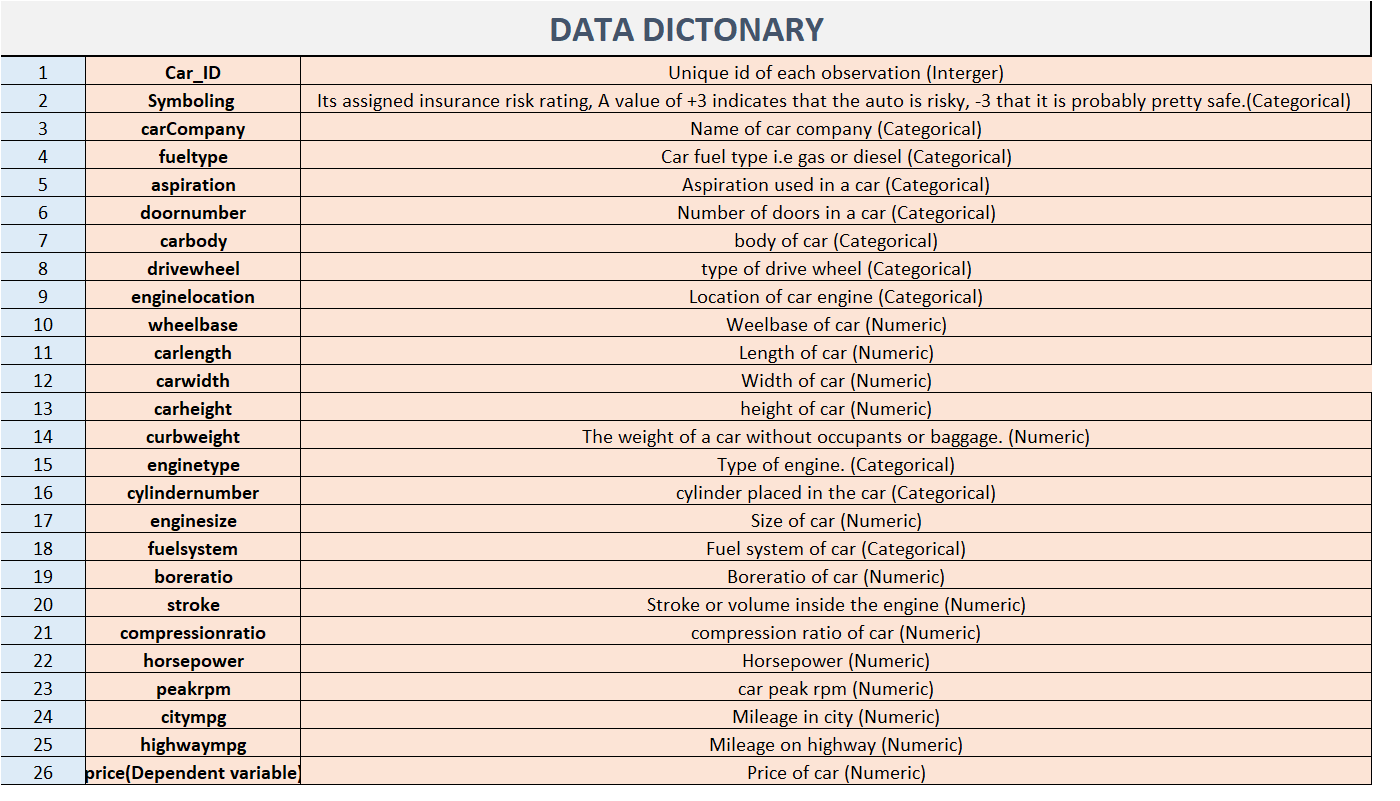

In [ ]:
df.shape

(205, 26)

In [ ]:
df.duplicates

NameError: ignored

In [ ]:
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols

['doornumber',
 'enginelocation',
 'cylindernumber',
 'CarName',
 'fuelsystem',
 'fueltype',
 'drivewheel',
 'carbody',
 'aspiration',
 'enginetype']

In [ ]:
num_cols

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
print(df.shape)
print(df.isnull().sum())

(205, 26)
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
cols = ['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

# Statistical Analysis

## Analysing the numerical data
### Multicollinearity

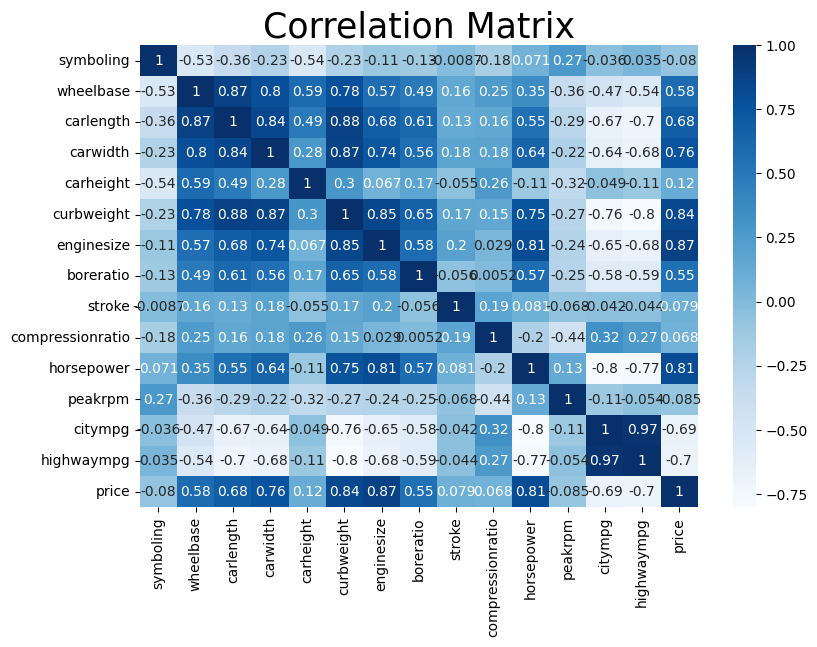

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Correlation Matrix', fontsize=25)
sns.heatmap(df[cols].corr(), cmap='Blues', annot=True)
plt.show()

* There is correlation between highwaympg, citympg(0.97)
* There is correlation between wheelbase, carlength(0.87)
* There are features not correlated with price

In [ ]:
# remove wheelbase # remove city mpg
df=df.drop(['wheelbase','citympg'], axis = 1)

a_cols = ['symboling', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
       'price']

In [ ]:
# Assumption of Regression
"""
1. Choose the variables/regressors to focus on (here all may be, leave the correlated column)
2. (you can delete less than 5% values from a dataset if it has null values)
Assumption 1: Linearity (make data linear)
3.Check for linearity using scatter plot
Assumption 2: No endogenity (find correaltion of residuals with individual x) - not now
Assumption 3: Normality and homodescadasticity(assumed to hold after transformation)(Normality assumed for big sample)
Assumption 4: autocorrelation
Assumption 5: Multicollinearity: We have obsserved and removed
"""

symboling


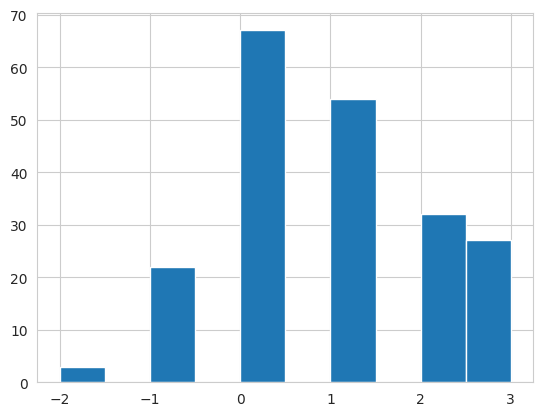

carlength


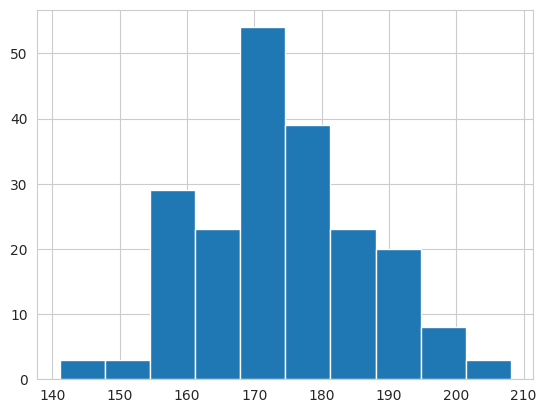

carwidth


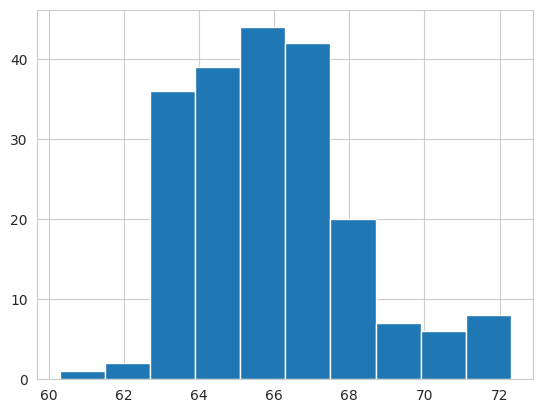

carheight


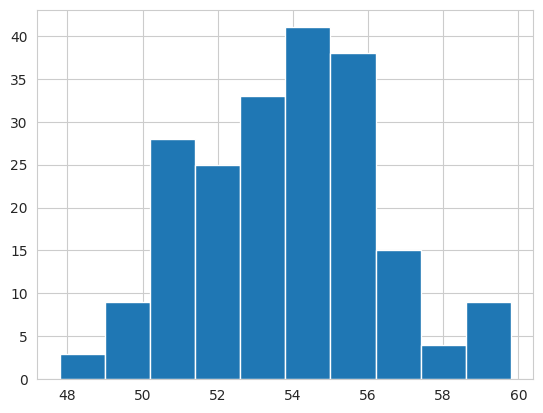

curbweight


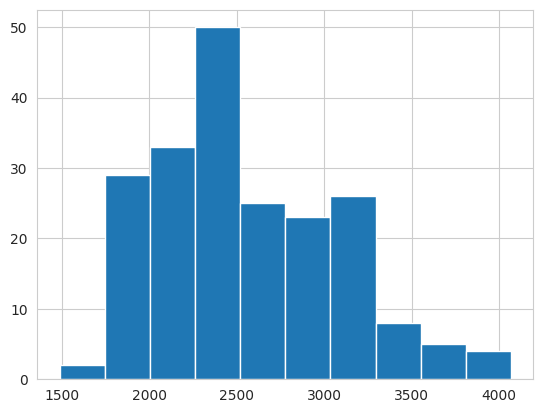

enginesize


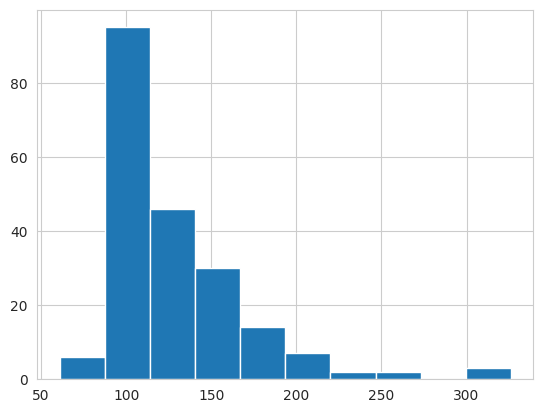

boreratio


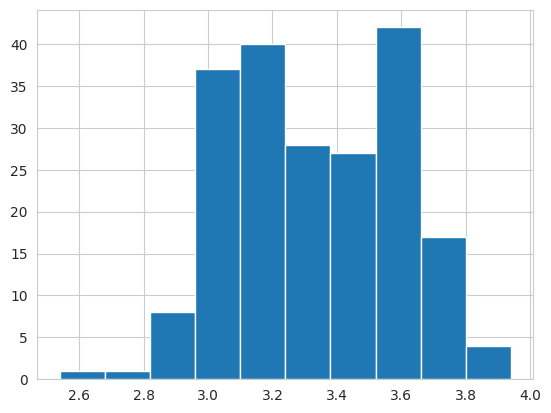

stroke


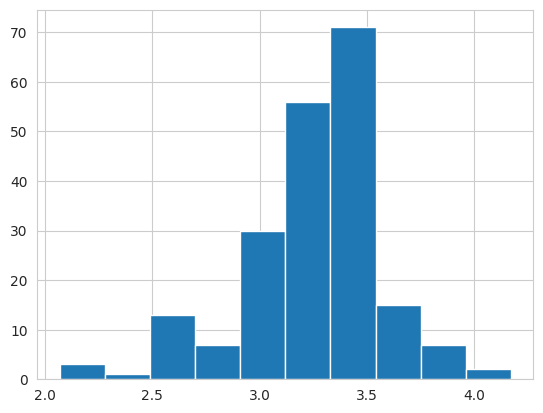

compressionratio


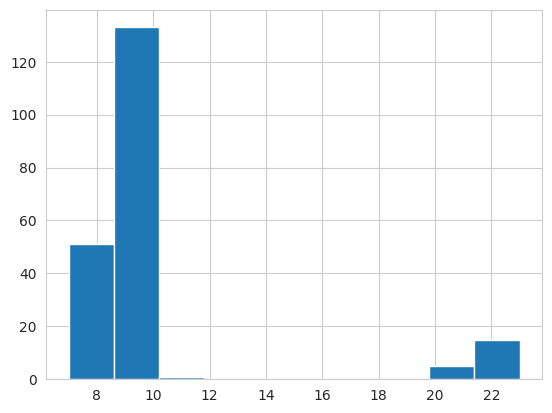

horsepower


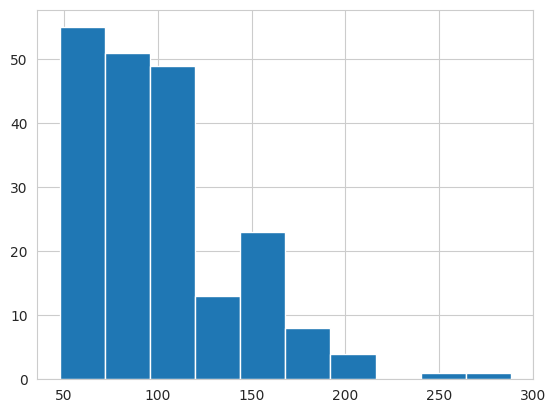

peakrpm


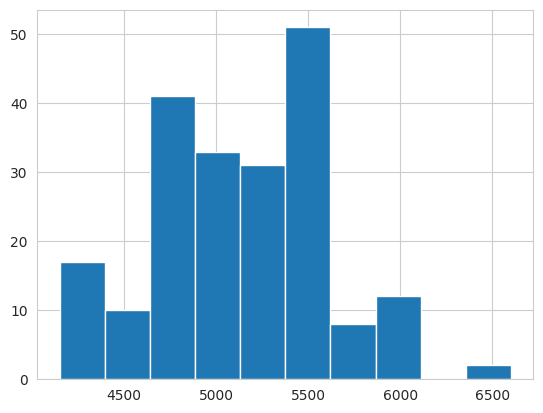

highwaympg


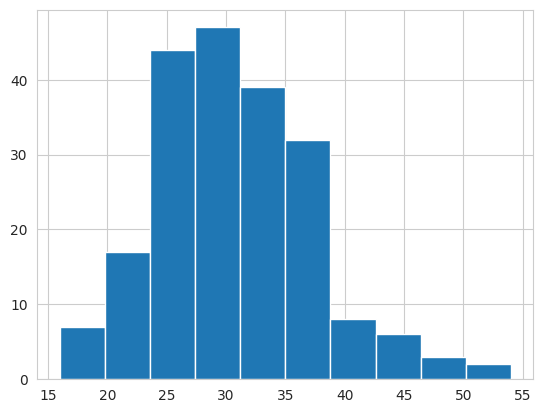

price


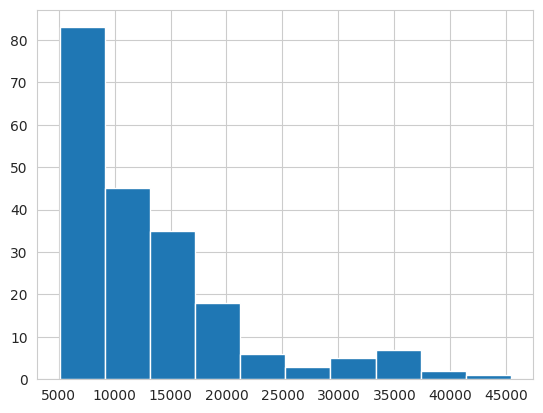

In [ ]:
# normality
for col in df[a_cols].columns:
    print(col)
    df[col].hist()
    plt.show()

In [ ]:
df[a_cols].skew()

symboling           0.211072
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
highwaympg          0.539997
price               1.777678
dtype: float64

* Lets consider -1 to +1 skewness as acceptable range
* Anything above -1 and +1 is transformed.
Positively skewed data: engine size, compressionratio, horsepower.
* 3 variables are applied transformation.

### Choose the appropriate transformation

In [ ]:
from scipy.special import boxcox1p

skew_cols = ['enginesize', 'compressionratio', 'horsepower']
df_logs = df[skew_cols]
df_boxcox = df[skew_cols]
df_sqr_rt = df[skew_cols]
df_cb_rt = df[skew_cols]

for i in skew_cols:
  df_logs.loc[:,i] = np.log(df_logs[i]+1)
  df_sqr_rt.loc[:,i] = np.sqrt(df_sqr_rt)
  df_cb_rt.loc[:,i] = np.cbrt(df_cb_rt)
  df_boxcox.loc[:,i] = boxcox1p(df_boxcox[i], 0.1)

<ipython-input-7-4971a7f6c60a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logs.loc[:,i] = np.log(df_logs[i]+1)


In [ ]:
df_logs.skew()

enginesize          0.864706
compressionratio    2.379056
horsepower          0.489938
dtype: float64

In [ ]:
df_boxcox.skew()

enginesize          0.960278
compressionratio    2.410323
horsepower          0.567415
dtype: float64

In [ ]:
df_sqr_rt.skew()

enginesize          1.364372
compressionratio    2.505819
horsepower          0.899857
dtype: float64

In [ ]:
df_cb_rt.skew()

enginesize          1.187978
compressionratio    2.460265
horsepower          0.752902
dtype: float64

* Log transformation is choosen.

In [ ]:
# transform the data
df['enginesize'] = df_logs['enginesize']
df['compressionratio'] = df_logs['compressionratio']
df['horsepower'] = df_logs['horsepower']

### Linearity

Uncorrelated features w.r.to "price" are removed.

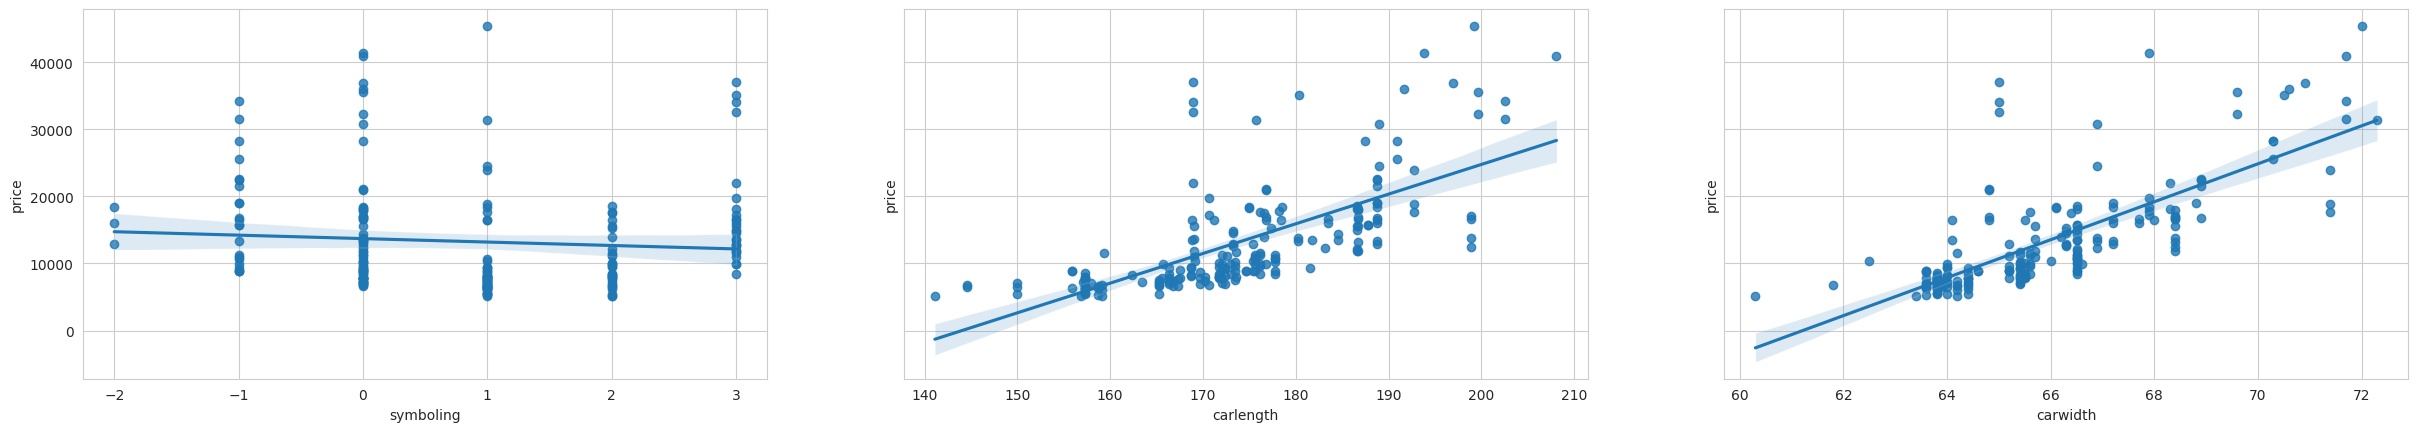

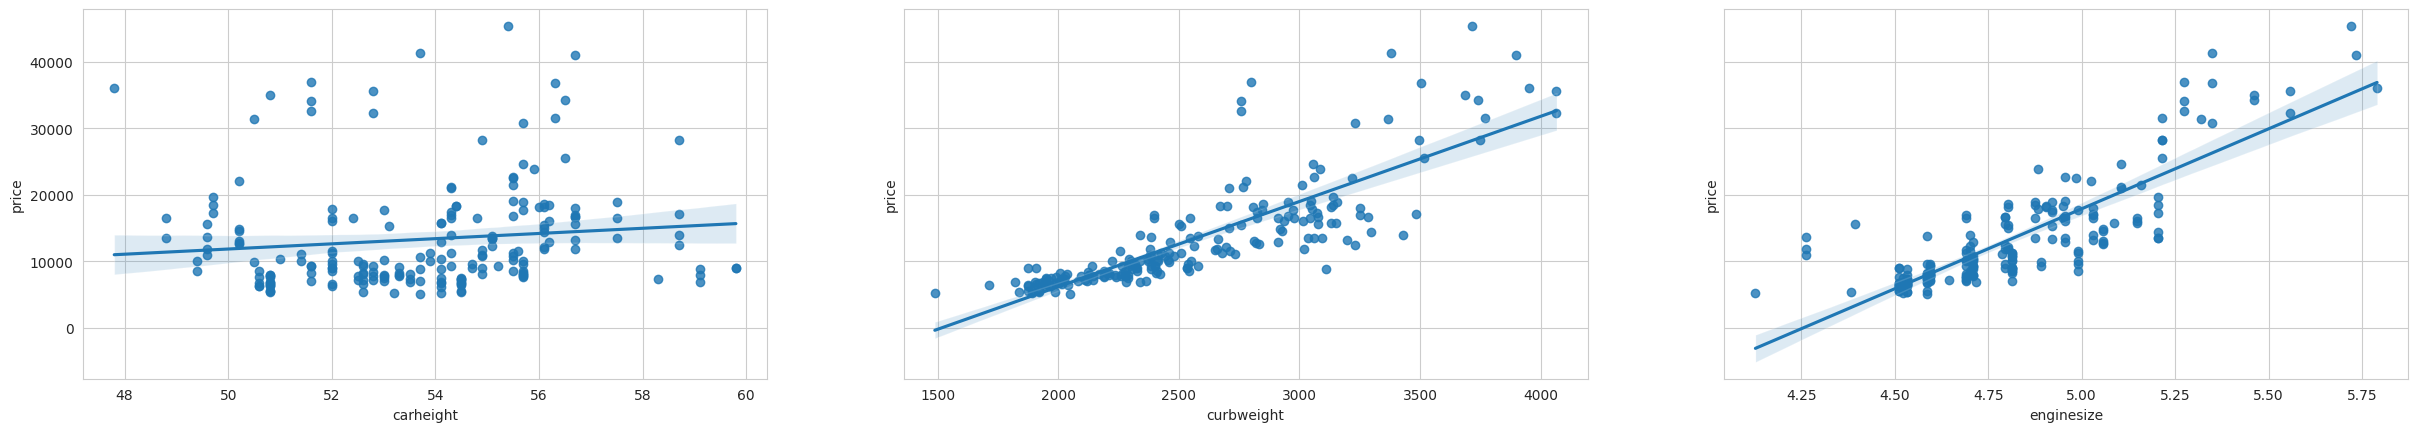

In [ ]:
# Check for linearity
sns.set_style("whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_figwidth(30)
sns.regplot(x=df[a_cols[0]], y=df['price'], ax=ax1);
sns.regplot(x=df[a_cols[1]], y=df['price'], ax=ax2);
sns.regplot(x=df[a_cols[2]], y=df['price'], ax=ax3);

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_figwidth(30)
sns.regplot(x=df[a_cols[3]], y=df['price'], ax=ax1);
sns.regplot(x=df[a_cols[4]], y=df['price'], ax=ax2);
sns.regplot(x=df[a_cols[5]], y=df['price'], ax=ax3);

In [ ]:
# symboling
# List of uncorrelated features
non_correlated = []
non_correlated.append('symboling')
non_correlated.append('carheight')

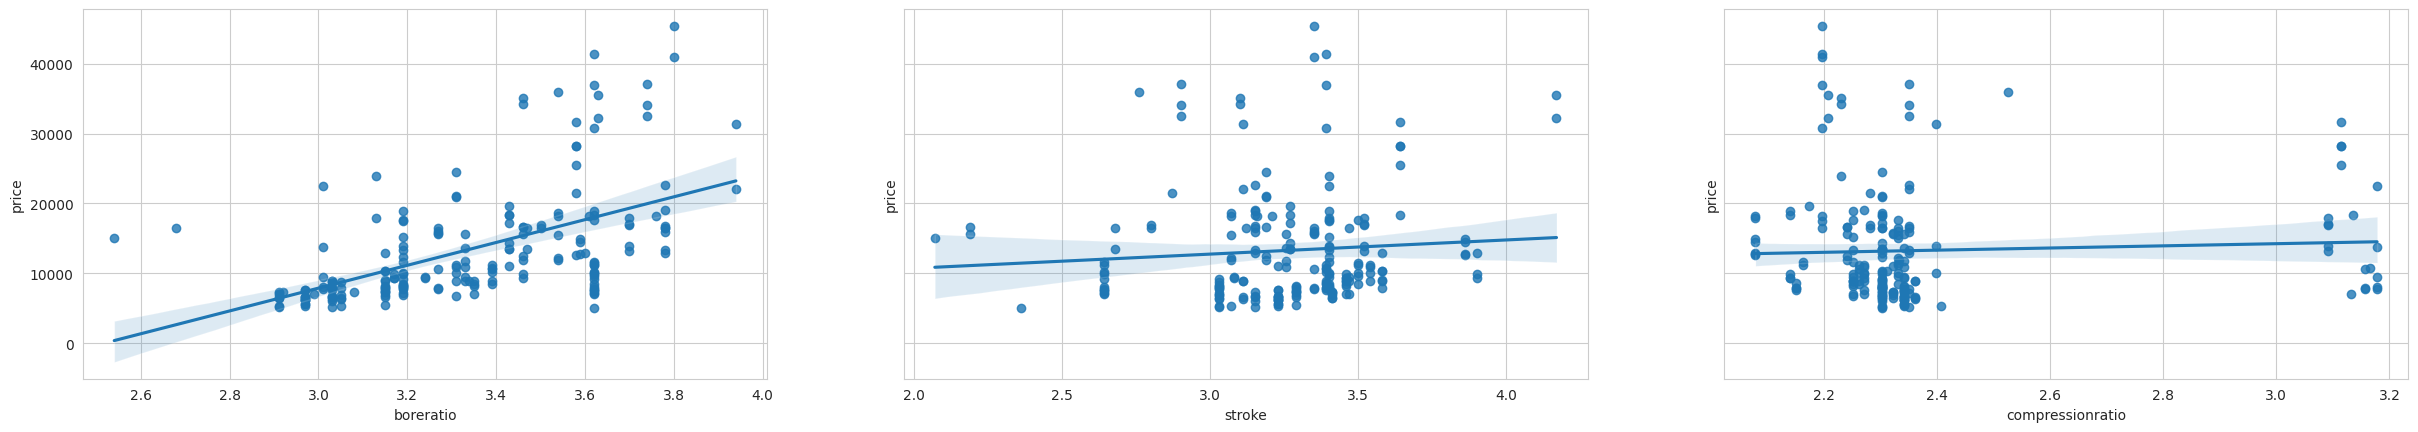

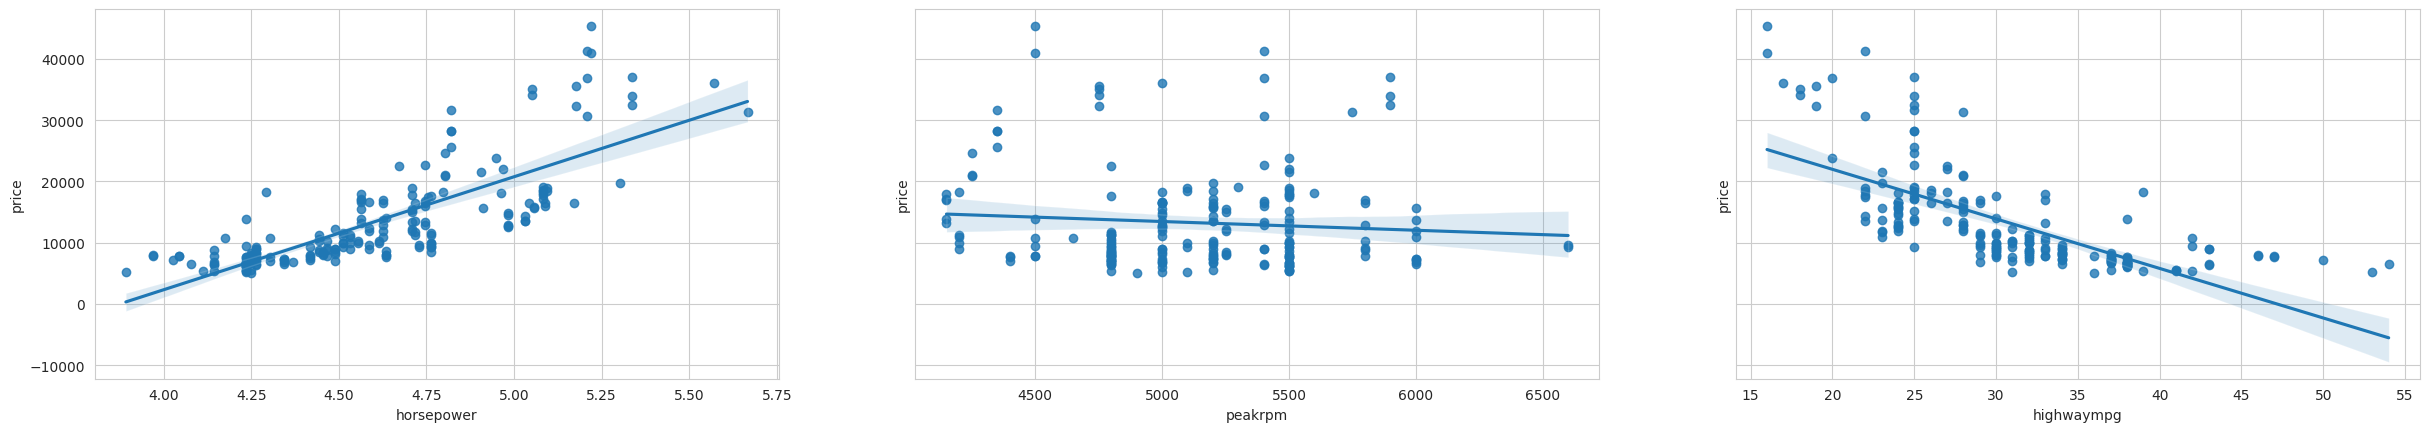

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_figwidth(30)
sns.regplot(x=df[a_cols[6]], y=df['price'], ax=ax1);
sns.regplot(x=df[a_cols[7]], y=df['price'], ax=ax2);
sns.regplot(x=df[a_cols[8]], y=df['price'], ax=ax3);

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_figwidth(30)
sns.regplot(x=df[a_cols[9]], y=df['price'], ax=ax1);
sns.regplot(x=df[a_cols[10]], y=df['price'], ax=ax2);
sns.regplot(x=df[a_cols[11]], y=df['price'], ax=ax3);

In [ ]:
# stroke, compressionratio
non_correlated.append('stroke')
non_correlated.append('compressionratio')
non_correlated.append('peakrpm')

In [ ]:
non_correlated

['symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm']

In [ ]:
df = df.drop(non_correlated, axis=1)

* Non correlated features are removed

## Handling Categorical Variables

In [ ]:
cate_cols

['enginelocation',
 'CarName',
 'cylindernumber',
 'carbody',
 'drivewheel',
 'enginetype',
 'aspiration',
 'fueltype',
 'fuelsystem',
 'doornumber']

In [ ]:
# Remove Carname and ID
df = df.drop(['car_ID', 'CarName'], axis=1)
# remove carname from catecols
cate_cols = ['carbody',
 'cylindernumber',
 'enginelocation',
 'drivewheel',
 'fuelsystem',
 'aspiration',
 'doornumber',
 'fueltype',
 'enginetype']

for i in cate_cols:
  print(i)
  print(df[i].unique())

carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
enginelocation
['front' 'rear']
drivewheel
['rwd' 'fwd' '4wd']
fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
aspiration
['std' 'turbo']
doornumber
['two' 'four']
fueltype
['gas' 'diesel']
enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [ ]:
# Change cylinder number to numeric
no_dicts = {
    'four': 4,
    'six': 6,
    'five': 5,
    'three':3,
    'twelve':12,
    'two':2,
    'eight':8
}

df['cylindernumber'] = df['cylindernumber'].map(no_dicts)

### Analyse categorical variables

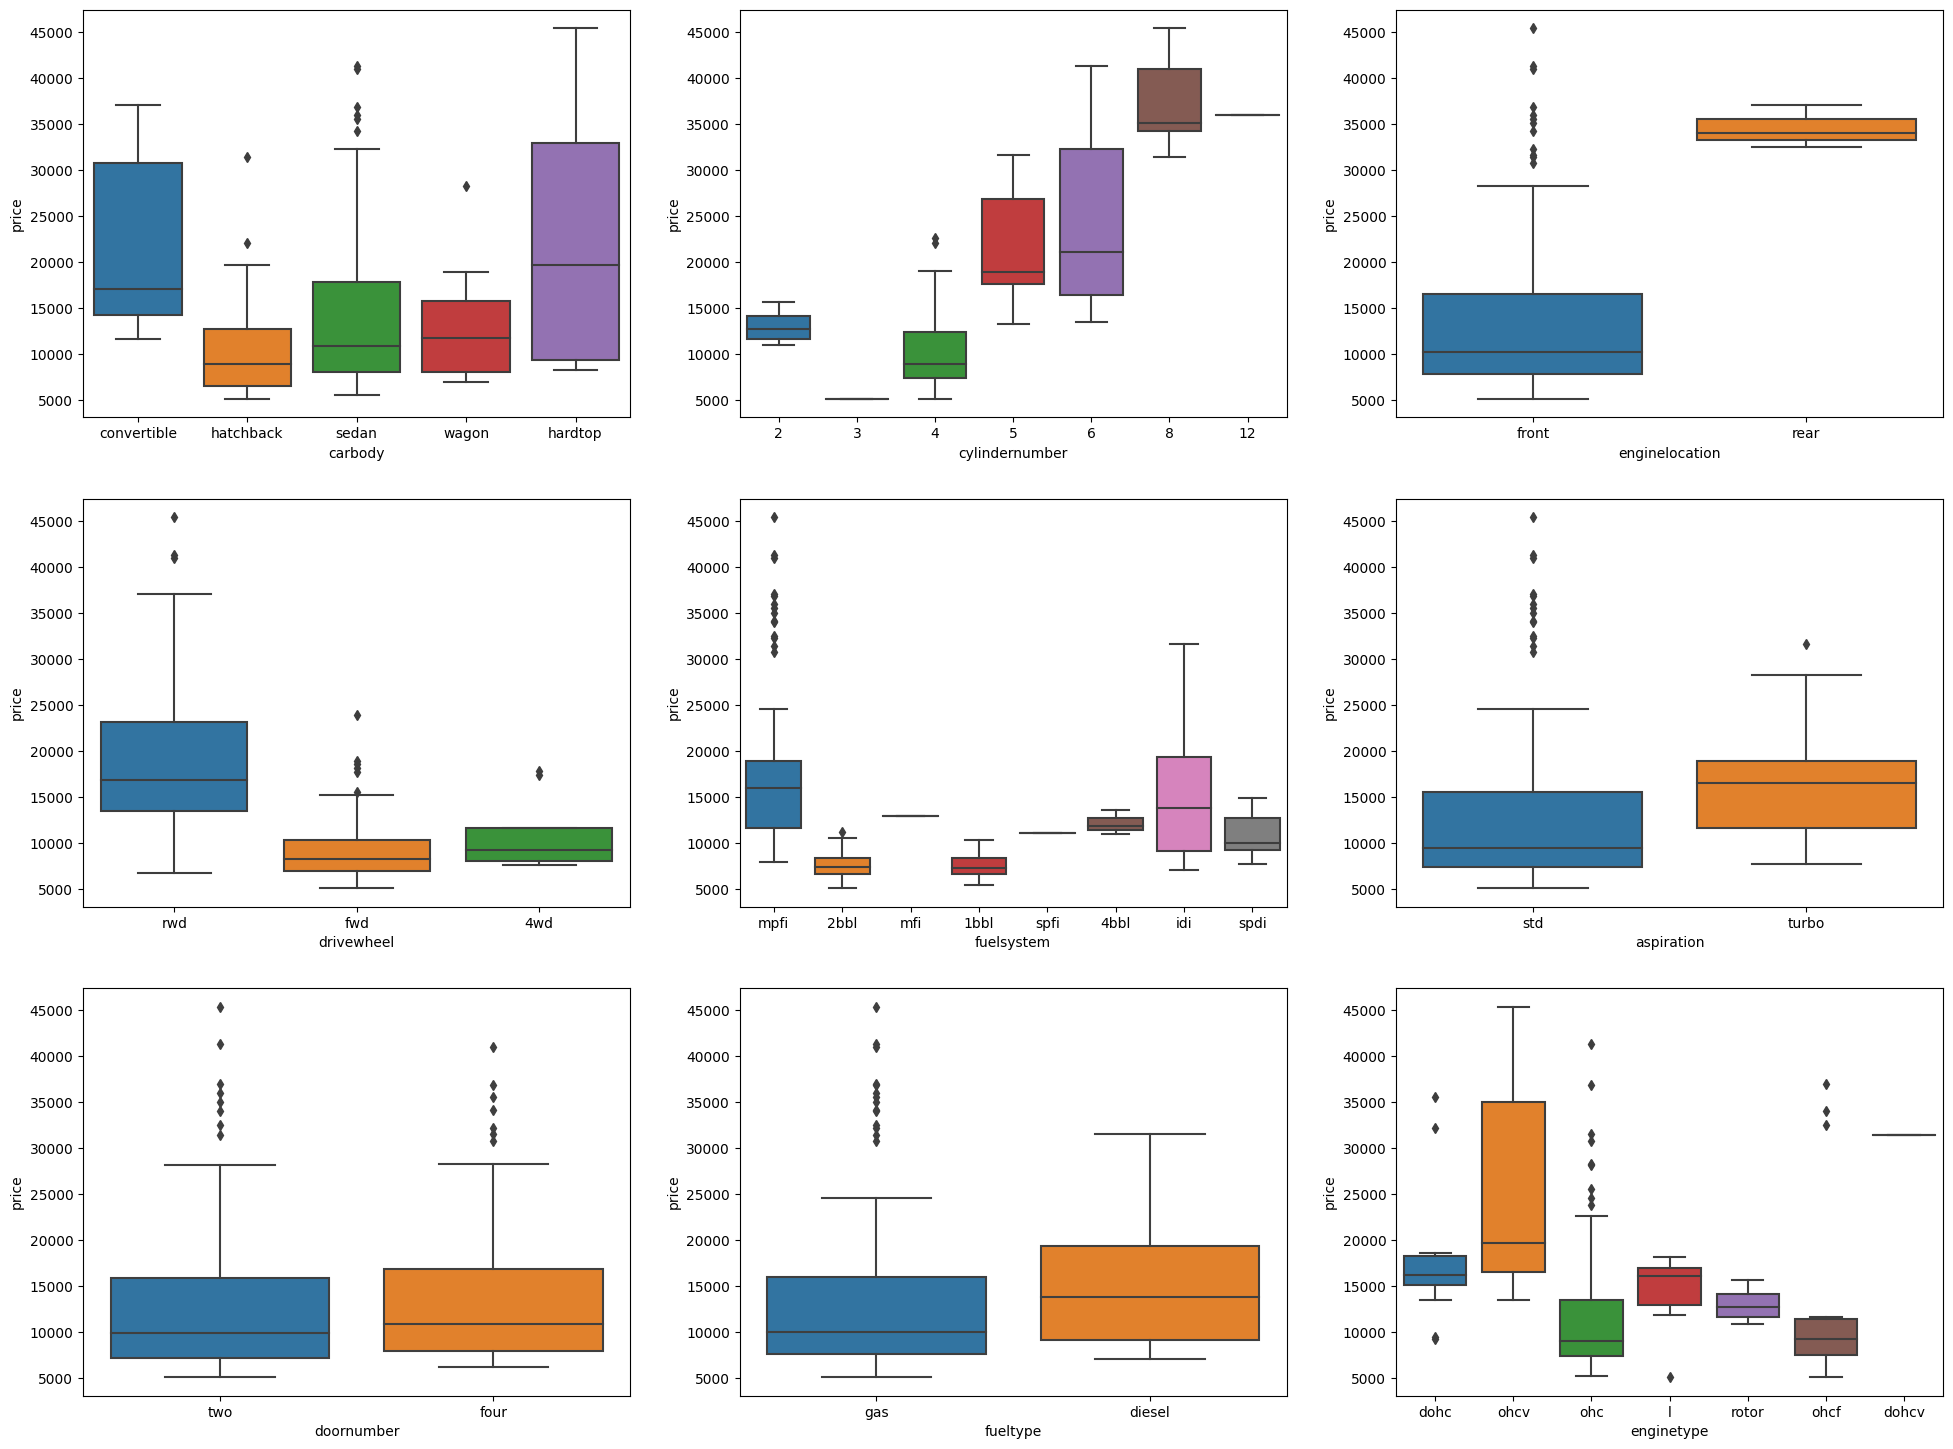

In [ ]:
fig, axes = plt.subplots(3,3 , figsize=(24,18))
axes = axes.flatten()
features = list(cate_cols)
for i in range(len(features)):
    sns.boxplot(x = features[i], y = 'price', data = df,ax=axes[i])
plt.show()

* Doornumber is not significant for determining price
* 3 variables is label encoded
* enginelocation, aspiration,fueltype   

In [ ]:
from sklearn import preprocessing
# 'enginelocation', 'aspiration','fueltype'
label_encoder = preprocessing.LabelEncoder()
df['enginelocation']= label_encoder.fit_transform(df['enginelocation'])
df['aspiration']= label_encoder.fit_transform(df['aspiration'])
df['fueltype']= label_encoder.fit_transform(df['fueltype'])

In [ ]:
# One hot encode the above variables
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
df= pd.get_dummies(df, columns = ['carbody',
 'drivewheel',
 'fuelsystem',
 'enginetype'])

In [ ]:
df.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,0,two,0,168.8,64.1,2548,4,4.875197,3.47,...,1,0,0,1,0,0,0,0,0,0
1,1,0,two,0,168.8,64.1,2548,4,4.875197,3.47,...,1,0,0,1,0,0,0,0,0,0
2,1,0,two,0,171.2,65.5,2823,6,5.030438,2.68,...,1,0,0,0,0,0,0,0,1,0
3,1,0,four,0,176.6,66.2,2337,4,4.700480,3.19,...,1,0,0,0,0,0,1,0,0,0
4,1,0,four,0,176.6,66.4,2824,5,4.919981,3.19,...,1,0,0,0,0,0,1,0,0,0


# Modelling

In [ ]:
df_y = pd.DataFrame(df['price'])
df_y.columns = ['price']
df = df.drop(['doornumber', 'price'], axis = 1)

In [ ]:
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import StandardScaler

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   carlength             205 non-null    float64
 1   carwidth              205 non-null    float64
 2   curbweight            205 non-null    int64  
 3   cylindernumber        205 non-null    int64  
 4   enginesize            205 non-null    float64
 5   boreratio             205 non-null    float64
 6   horsepower            205 non-null    float64
 7   highwaympg            205 non-null    int64  
 8   carbody_convertible   205 non-null    uint8  
 9   carbody_hardtop       205 non-null    uint8  
 10  carbody_hatchback     205 non-null    uint8  
 11  carbody_sedan         205 non-null    uint8  
 12  carbody_wagon         205 non-null    uint8  
 13  enginelocation_front  205 non-null    uint8  
 14  enginelocation_rear   205 non-null    uint8  
 15  drivewheel_4wd        2

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df_y['price'], test_size = 0.20, random_state = 42)
sc = StandardScaler()
# Applying Standard Scaler
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model

In [ ]:
print("------------------------------LINEAR REGRESSION-------------------------------")
LR = linear_model.LinearRegression()
LR.fit(x_train, y_train)
print('Coefficients: ', LR.coef_)
print('Intercept: ', LR.intercept_)
y_hat = LR.predict(x_test)

mae = mean_absolute_error(y_test, y_hat)
print(f'Mean Absolute Error = {mae:.2f}')
rmse = mean_squared_error(y_test, y_hat, squared = False)
print(f'Root Mean Squared Error = {rmse:.2f}')
r2 = r2_score(y_test, y_hat)
print(f'R-Squared Score = {r2*100:.2f} %')

print("------------------------------RIDGE REGRESSION-------------------------------")
rdg_model = Ridge(alpha = 50)
rdg_model.fit(x_train, y_train)

rdg_pred = rdg_model.predict(x_test)
mse = mean_absolute_error(y_test, rdg_pred)
print(f'Mean Absolute Error = {mse:.2f}')
rmse = mean_squared_error(y_test, rdg_pred, squared = False)
print(f'Root Mean Squared Error = {rmse:.2f}')
r2 = r2_score(y_test, rdg_pred)
print(f'R-Squared Score = {r2*100:.2f} %')


reg = Lasso(alpha=1)
reg.fit(x_train, y_train)

# LASSO REGRESSION

print("------------------------------LASSO REGRESSION-------------------------------")
pred = reg.predict(x_test)
ls_pred = reg.predict(x_test)
mae_ls = mean_absolute_error(y_test, ls_pred)
print(f'Mean Absolute Error = {mae_ls:.2f}')
rmse_ls = mean_squared_error(y_test, ls_pred, squared = False)
print(f'Root Mean Squared Error = {rmse_ls:.2f}')
r2_ls = r2_score(y_test, ls_pred)
print(f'R-Squared Score = {r2_ls*100:.2f} %')

------------------------------LINEAR REGRESSION-------------------------------
Coefficients:  [  167.94000842   492.06842046  2102.03951073  -491.4194057
  2107.07234319  4024.84035296  2250.69286086  -127.07138714
   139.12966479  -743.01918417  -468.72059755   631.12925444
   286.97148151  -222.76017774   277.6392129   -627.55371759
  -309.73327164  -294.32521823   418.28592868   214.36036914
    81.95557247  -264.79767739  -167.94000842  -139.81706409
   128.39905183  -252.04493373  -227.03765508    26.49423973
    46.99673335 -1031.37092711   464.00670656    57.27181682
  -510.32372708  1075.3430232 ]
Intercept:  13223.414634146342
Mean Absolute Error = 2566.78
Root Mean Squared Error = 4212.67
R-Squared Score = 77.52 %
------------------------------RIDGE REGRESSION-------------------------------
Mean Absolute Error = 2803.65
Root Mean Squared Error = 4282.60
R-Squared Score = 76.77 %
------------------------------LASSO REGRESSION-------------------------------
Mean Absolute Error 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.903e+06, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


## Evaluation and Feature Selection  

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

Feature 0: 0.531249
Feature 1: 3.853359
Feature 2: 26.770307
Feature 3: 119.835361
Feature 4: 201.226845
Feature 5: 343.186188
Feature 6: 161.367300
Feature 7: 401.759750
Feature 8: 68.842957
Feature 9: 284.633882
Feature 10: 167.996853
Feature 11: 8.138041
Feature 12: 16.110529
Feature 13: 10.438903
Feature 14: 0.916677
Feature 15: 0.291094
Feature 16: 0.790528
Feature 17: 89.978317
Feature 18: 108.547366
Feature 19: 5.643214
Feature 20: 56.160772
Feature 21: 0.007676
Feature 22: 0.531249
Feature 23: 0.001121
Feature 24: 71.975552
Feature 25: 0.667682
Feature 26: 0.078904
Feature 27: 5.302353
Feature 28: 5.699962
Feature 29: 1.008756
Feature 30: 35.081229
Feature 31: 0.766542
Feature 32: 29.007782
Feature 33: 0.012067


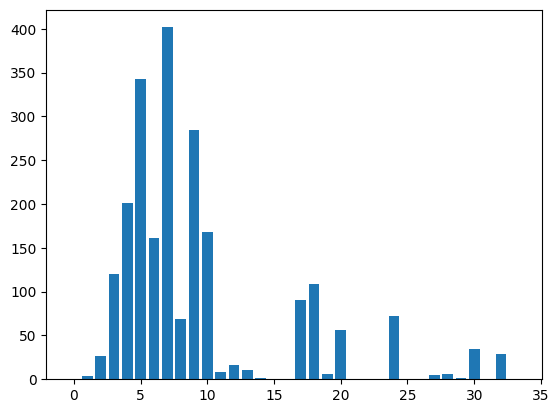

In [ ]:
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Model Built using Selected Features

def select_features(X_train, y_train, X_test):
 # configure to select a subset of features
 fs = SelectKBest(score_func=f_regression, k=10)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)


# Linear Regression
print('LINEAR REGRESSION------------------------')
LR_f = linear_model.LinearRegression()
LR_f.fit(x_train_fs, y_train)
print('Coefficients: ', LR_f.coef_)
print('Intercept: ', LR_f.intercept_)


y_hat_f = LR_f.predict(x_test_fs)

mae = mean_absolute_error(y_test, y_hat_f)
print(f'Mean Absolute Error = {mae:.2f}')
rmse = mean_squared_error(y_test, y_hat_f, squared = False)
print(f'Root Mean Squared Error = {rmse:.2f}')
r2 = r2_score(y_test, y_hat_f)
print(f'R-Squared Score = {r2*100:.2f} %')


# Ridge Model

print("RIDGE REGRESSION MODEL------------------")
rdg_model_f = Ridge(alpha = 50)
rdg_model_f.fit(x_train_fs, y_train)

rdg_pred_f = rdg_model_f.predict(x_test_fs)
mae = mean_absolute_error(y_test, rdg_pred_f)
print(f'Mean Absolute Error = {mae:.2f}')
rmse = mean_squared_error(y_test, rdg_pred_f, squared = False)
print(f'Root Mean Squared Error = {rmse:.2f}')
r2 = r2_score(y_test, rdg_pred_f)
print(f'R-Squared Score = {r2*100:.2f} %')

# Lasso Regression

print("LASSO REGRESSION-----------------------")


reg_f = Lasso(alpha=1)
reg_f.fit(x_train_fs, y_train)

# print('R squared training set', round(reg_f.score(x_train_fs, y_train)*100, 2))
# print('R squared test set', round(reg_f.score(x_test_fs, y_test)*100, 2))
pred_f = reg_f.predict(x_test_fs)

mae = mean_absolute_error(y_test, pred_f)
print(f'Mean Absolute Error = {mae:.2f}')
rmse = mean_squared_error(y_test, pred_f, squared = False)
print(f'Root Mean Squared Error = {rmse:.2f}')
r2 = r2_score(y_test, pred_f)
print(f'R-Squared Score = {r2*100:.2f} %')

LINEAR REGRESSION------------------------
Coefficients:  [-464.79017313 1723.0538208  1241.81276742 1636.13845302 1160.207032
 1665.10783363 -108.92862364  -11.41509548 1095.67340164   18.59402936]
Intercept:  13223.41463414634
Mean Absolute Error = 2720.33
Root Mean Squared Error = 3924.86
R-Squared Score = 80.49 %
RIDGE REGRESSION MODEL------------------
Mean Absolute Error = 2880.45
Root Mean Squared Error = 4122.17
R-Squared Score = 78.48 %
LASSO REGRESSION-----------------------
Mean Absolute Error = 2721.19
Root Mean Squared Error = 3924.86
R-Squared Score = 80.49 %


* LASSO REGRESSION has performed well
* More data will give better model.
### References:
* https://machinelearningmastery.com/feature-selection-for-regression-data/